# Machine Learning Labwork (11 - 20).
<li>Prepared by: Shraddha Vasa</li>
<ol>MSc. Data Science (III)</ol>
<li>Roll number: 121922502020</li>

# 12. A weather prediction model that predicts if there’ll be rain or not in a particular day with decision tree regression concept. 

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("austin_weather.csv")
df.sample(3)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
507,2015-05-12,69,67,65,67,65,63,100,91,81,...,30.14,30.05,10,8,1,10,5,17,0.23,Rain
329,2014-11-15,48,44,40,47,39,23,100,72,43,...,30.14,30.03,10,5,1,10,4,15,0.02,Rain
509,2015-05-14,87,78,68,74,71,66,100,83,65,...,30.03,29.94,10,6,1,15,5,24,0.08,Rain


In [4]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [5]:
df.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], inplace = True, axis = 1)

In [6]:
df = df.replace('T', 0.0) 
df = df.replace('-', 0.0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TempHighF                  1319 non-null   int64 
 1   TempAvgF                   1319 non-null   int64 
 2   TempLowF                   1319 non-null   int64 
 3   DewPointHighF              1319 non-null   object
 4   DewPointAvgF               1319 non-null   object
 5   DewPointLowF               1319 non-null   object
 6   HumidityHighPercent        1319 non-null   object
 7   HumidityAvgPercent         1319 non-null   object
 8   HumidityLowPercent         1319 non-null   object
 9   SeaLevelPressureAvgInches  1319 non-null   object
 10  VisibilityHighMiles        1319 non-null   object
 11  VisibilityAvgMiles         1319 non-null   object
 12  VisibilityLowMiles         1319 non-null   object
 13  WindHighMPH                1319 non-null   object
 14  WindAvgM

In [8]:
cols = df.columns.values[3:]
for COL in cols:
    df[COL] = df[COL].astype(np.float32)

In [9]:
def transformer(var):
    if var == 0.0:
        return 0
    else:
        return 1

# Applying the transformation.
df['target'] = df['PrecipitationSumInches'].apply(transformer)

In [10]:
df['target'].value_counts()

0    994
1    325
Name: target, dtype: int64

In [11]:
sampled_0 = df[df['target'] == 0].sample(n = 350, random_state = 100)
all_1 = df[df['target'] == 1]

# Concatenating these datasets.
df_new = pd.concat([sampled_0, all_1], ignore_index = True)

In [12]:
df_new.shape

(675, 18)

In [13]:
X = df_new.drop(['PrecipitationSumInches', 'target'], axis = 1)
Y = df_new['target']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state = 100)

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_split = 5,
                                    max_features = 8,
                                    max_leaf_nodes = 8,
                                    max_depth = 3,
                                    random_state = 100)
classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
def classification_performance(y_pred_train, y_pred_test,
                               y_train = y_train, y_test = y_test):
    
    print('Training Set: ')
    print('Accuracy Score = ', round(accuracy_score(y_train, y_pred_train), 2) )
    print('F1 - Score = ', round(f1_score(y_train, y_pred_train), 2) )
    print('ROC AUC Score = ', round(roc_auc_score(y_train, y_pred_train), 2) )
    print()
    print('Testing Set: ')
    print('Accuracy Score = ', round(accuracy_score(y_test, y_pred_test), 2) )
    print('F1 - Score = ', round(f1_score(y_test, y_pred_test), 2) )
    print('ROC AUC Score = ', round(roc_auc_score(y_test, y_pred_test), 2) )

    return

In [17]:
classification_performance(y_pred_train, y_pred_test)

Training Set: 
Accuracy Score =  0.88
F1 - Score =  0.88
ROC AUC Score =  0.88

Testing Set: 
Accuracy Score =  0.85
F1 - Score =  0.84
ROC AUC Score =  0.85


# 13. A Python script to create a confusion matrix on a predicted model. 

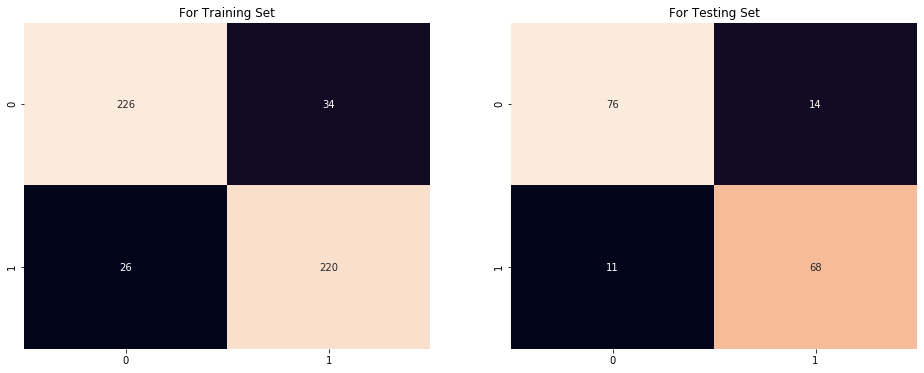

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot = True, fmt='0.0f', cbar=False)
plt.title('For Training Set')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot = True, cbar = False)
plt.title('For Testing Set')

plt.show()

# 14. Consider a dataset where we have a value of response y for every feature x.
# a) Find a line which fits best and predict the response for any new feature values using simple linear regression.
# b) Find the errors using Least Squares technique to fine tune the model.
# X 0 1 2 3 4 5 6 7 8 9
# Y 1 3 2 5 7 8 8 9 10 12 

In [19]:
import numpy as np
import pandas as pd

In [20]:
# The sample data.
X = np.arange(10).reshape(-1,1)
Y = np.array([1,3,2,5,7,8,8,9,10,12]).reshape(-1,1)

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, Y)
Y_pred = reg.predict(X)

In [22]:
print('The slope of the best fit line is ',round(reg.coef_[0][0], 3))
print('The intercept of the best fit line is ',  round(reg.intercept_[0], 3))
print('The fitted linear equation is:\ny_pred = ' + str(round(reg.coef_[0][0], 3)) + ' * X + ' + str(round(reg.intercept_[0], 3)))

The slope of the best fit line is  1.17
The intercept of the best fit line is  1.236
The fitted linear equation is:
y_pred = 1.17 * X + 1.236


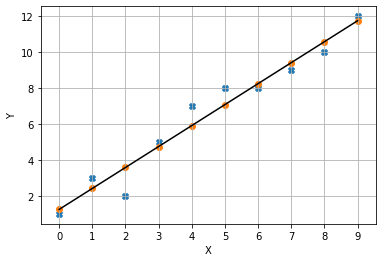

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(X, Y, marker='X')
plt.scatter(X, Y_pred)
plt.plot(X, Y_pred, 'k')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.xticks(X)
plt.show()

In [24]:
squared_error = (Y - Y_pred)**2
pd.DataFrame(squared_error.round(3), columns = ['Squared Error'])

,Squared Error
0,0.056
1,0.353
2,2.483
3,0.065
4,1.177
5,0.838
6,0.065
7,0.180
8,0.353
9,0.056


<h1>15. Consider a dataset with p features ( or independent variables) and one response ( or
dependent variable). Also the dataset contains n rows/observations.</h1>
<h1>a. Find the regression line using multiple linear regression.</h1>
<h1>b. Find the residual error of ith observation.</h1>

In [25]:
import numpy as np
import pandas as pd

In [26]:
# Constructing the dataset manually.
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples = 500,
                       n_features = 5,
                       n_informative = 5,
                       n_targets = 1,
                       noise = 0.1, 
                       random_state = 100)

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, Y)
Y_pred = linreg.predict(X)

In [28]:
print('Intercept = ',linreg.intercept_.round(3))
print('Weights = ',linreg.coef_.round(3))

Intercept =  0.005
Weights =  [47.983 86.044 14.339 16.773 54.532]


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Squared Error = ', round(mean_squared_error(Y, Y_pred), 3))
print('Root Mean Squared Error = ', round(mean_squared_error(Y, Y_pred, squared = False), 3))
print('Mean Absolute Error = ', round(mean_absolute_error(Y, Y_pred), 3))

Mean Squared Error =  0.009
Root Mean Squared Error =  0.096
Mean Absolute Error =  0.076


In [30]:
cc = pd.concat([pd.DataFrame(X), pd.DataFrame(Y)],
               ignore_index=True, axis = 1)

cc.columns = list('ABCDE') + ['target']
cc['predictions'] = Y_pred
cc['residuals'] = Y - Y_pred
cc.head(3)

,A,B,C,D,E,target,predictions,residuals
0,1.569733,-1.192708,0.905906,-0.966887,-0.110338,-36.527279,-36.544744,0.017465
1,-0.147940,-1.117347,-0.919339,0.499645,-1.645060,-197.907221,-197.743839,-0.163382
2,0.679138,0.521998,0.563949,1.077804,-0.058190,100.414544,100.498737,-0.084193


<h1>16. A researcher has collected data on three psychological variables, four academic
variables (standardized test scores), and the type of educational program the student
is in for 600 high school students. She is interested in how the set of psychological
variables is related to the academic variables and the type of program the student is
in using Multivariate Regression.</h1>


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [32]:
dm= pd.read_sas('https://stats.idre.ucla.edu/wp-content/uploads/2016/02/mvreg.sas7bdat')
dm

,LOCUS_OF_CONTROL,SELF_CONCEPT,READ,WRITE,SCIENCE,MOTIVATION,PROG
0,-1.143955,0.722641,37.405548,39.032845,33.532822,0.368973,2.0
1,0.504134,0.111364,52.760784,51.995041,65.225044,0.520319,2.0
2,1.628546,0.629934,59.771915,54.651653,64.604500,0.436838,2.0
3,0.368096,-0.138528,42.854324,41.121357,48.493809,-0.004324,3.0
4,-0.280190,-0.452226,54.756279,49.947208,50.381657,1.256924,2.0
...,...,...,...,...,...,...,...
595,-1.664108,0.957749,53.002762,56.568569,57.731705,-0.284300,2.0
596,-0.947804,-0.983263,48.866882,66.135147,50.199982,0.457832,3.0
597,-0.435458,-1.302765,73.271301,76.813126,69.573441,-1.459316,1.0
598,-0.964431,0.072325,40.705734,46.886673,42.320671,-0.343068,1.0


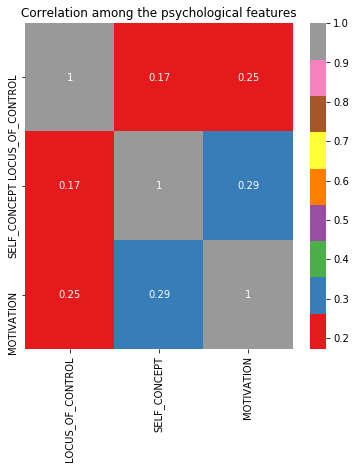

In [33]:
# Correlation among the psychological features.
corr_mat = dm[['LOCUS_OF_CONTROL', 'SELF_CONCEPT', 'MOTIVATION']].corr()

plt.figure(figsize = (6,6))
sns.heatmap(corr_mat, cmap = 'Set1', annot = True)
plt.title('Correlation among the psychological features')
plt.show()

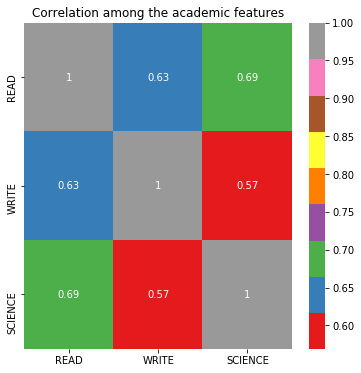

In [34]:
# Correlation among the academic features.
corr_mat = dm[['READ', 'WRITE', 'SCIENCE']].corr()

plt.figure(figsize = (6,6))
sns.heatmap(corr_mat, cmap = 'Set1', annot = True)
plt.title('Correlation among the academic features')
plt.show()

In [35]:
from statsmodels.multivariate.manova import MANOVA

In [36]:
test = MANOVA.from_formula(formula = 'LOCUS_OF_CONTROL + SELF_CONCEPT + MOTIVATION ~ READ + WRITE + SCIENCE + C(PROG)', data = dm)
print(test.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8136 3.0000 592.0000 45.1977 0.0000
          Pillai's trace 0.1864 3.0000 592.0000 45.1977 0.0000
  Hotelling-Lawley trace 0.2290 3.0000 592.0000 45.1977 0.0000
     Roy's greatest root 0.2290 3.0000 592.0000 45.1977 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        C(PROG)         Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8914 6.0000 1184.0000 11.6708 0.0000
         Pillai's trace 0.1086 6.0000 1186.0000 11.3550 0.0000
 Hotelling-

In [37]:

test2 = MANOVA.from_formula(formula = 'READ + WRITE + SCIENCE + C(PROG) ~ LOCUS_OF_CONTROL + SELF_CONCEPT + MOTIVATION', data = dm)
print(test2.mv_test())

                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept               Value         Num DF  Den DF         F Value         Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda               0.0000 6.0000 591.0000 73934093882665536.0000 0.0000
         Pillai's trace               1.0000 6.0000 591.0000 73934093882665552.0000 0.0000
 Hotelling-Lawley trace 750599937895081.6250 6.0000 591.0000 73934093882665552.0000 0.0000
    Roy's greatest root 750599937895081.6250 6.0000 591.0000 73934093882665536.0000 0.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------

<h1>17. Demonstrate to find the values of the parameters of a function that minimizes the cost function using Stochastic Gradient Descent.</h1>

In [38]:
import numpy as np
import pandas as pd

In [39]:
# Constructing the dataset manually.
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples = 500,
                       n_features = 5,
                       n_informative = 5,
                       n_targets = 1,
                       noise = 0.1, 
                       random_state = 100)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
m = X.shape[0]

# Number of features.
num_features = X.shape[1]

# Initiate theta values.
np.random.seed(100)
theta = np.random.randn(num_features)

# Define the hypothesis function.
def hypothesis(theta, X):
    return theta*X

# Use the definition of cost function.
def compute_cost(X, Y , theta):
    Y1 = hypothesis(theta, X)
    Y1 = np.sum(Y1, axis = 1)
    return np.sum(np.sqrt((Y1 - Y) ** 2)) / (2*m)

# Gradient Descent algorithm.
def gradient_descent(X, Y, theta, alpha = 0.01, num_iter = 1000):
    '''
    theta -- the weight values to be tuned.
    alpha -- learning rate.
    num_iter -- number of iterations.
    '''

    J = [] # stores value of cost at each iteration.
    for ii in range(num_iter):
        Y1 = hypothesis(theta, X)
        Y1 = np.sum(Y1, axis = 1)

        for jj in range(num_features):
            theta[jj] -= (alpha/m) * (np.sum((Y1 - Y) * X[:,jj]))
        cost = compute_cost(X, Y, theta)
        J.append(cost)

    return J, cost, theta

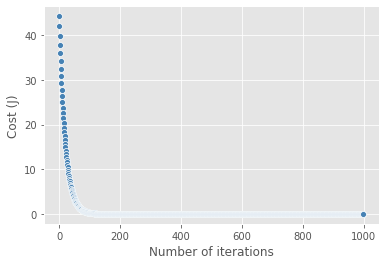

In [42]:
J, j, theta = gradient_descent(X, Y, theta, 0.05, 1000)

# Visualizing the trend of the cost function with the number of iterations.
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.scatterplot(x= np.arange(len(J)), y = J, color = 'steelblue')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.show()

In [43]:

print('The weight values for each features are: ')
print(theta.round(3))

The weight values for each features are: 
[47.983 86.044 14.339 16.773 54.532]


<h1>18. A python program to explore your data with matplotlib and PCA, preprocess your
data with normalization. Split the data into training and test sets. construct an
unsupervised model ( K-means algorithm) to fit the model to the data, predict
values, and validate the model that is built.</h1>

In [44]:
import numpy as np
import pandas as pd

In [45]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

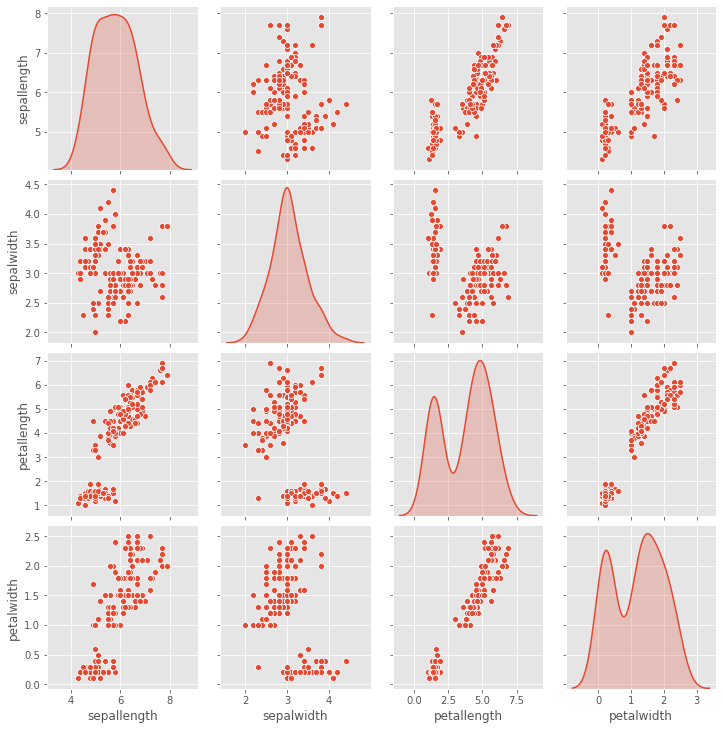

In [47]:
# Without hue.
sns.pairplot(iris, diag_kind = 'kde')

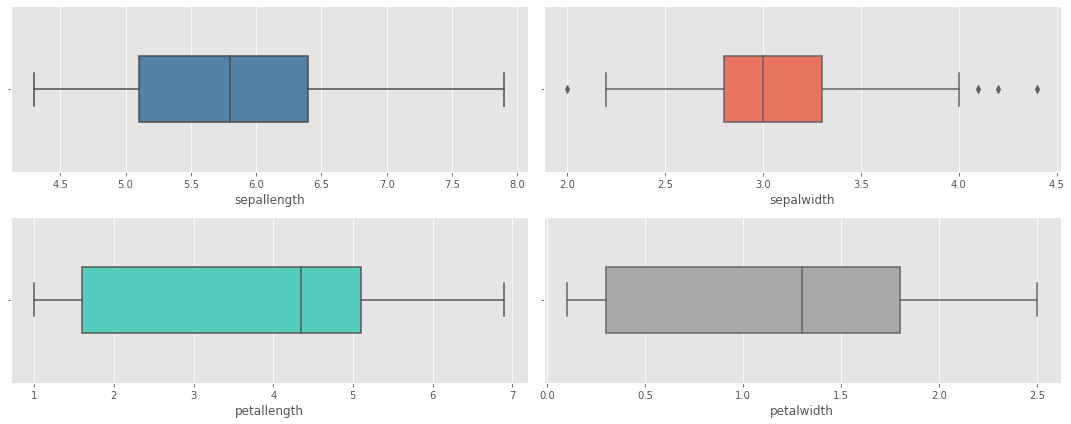

In [48]:
# Any Potential outliers?
plt.figure(figsize = (15,6))
colors = ['steelblue', 'tomato', 'turquoise', 'darkgray']
for ii, col in enumerate(iris.columns.values[:-1], 1):
    plt.subplot(2,2,ii)
    sns.boxplot(x = iris[col],hue = iris['class'],color = colors[ii-1],width = .4)
plt.tight_layout()
plt.show()

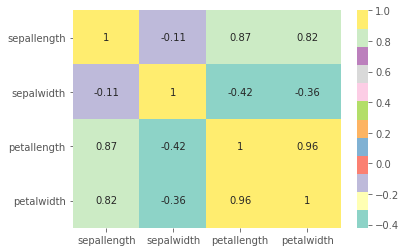

In [49]:
# Creating a Correlation matrix.
corr = iris.corr()
# Heatmap.
sns.heatmap(corr, cmap = 'Set3', annot = True)

<h1>19. Multidimensional data analysis in Python- import, Clustering, Exploratory Data
Analysis.</h1>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Loading the dataset.
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

# Taking the first two columns for X.
X = X[:,:2]

In [52]:
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=3)
clus.fit(X)

# Print Centroids.
print(clus.cluster_centers_.round(2))

[[5.01 3.43]
 [6.81 3.07]
 [5.77 2.69]]


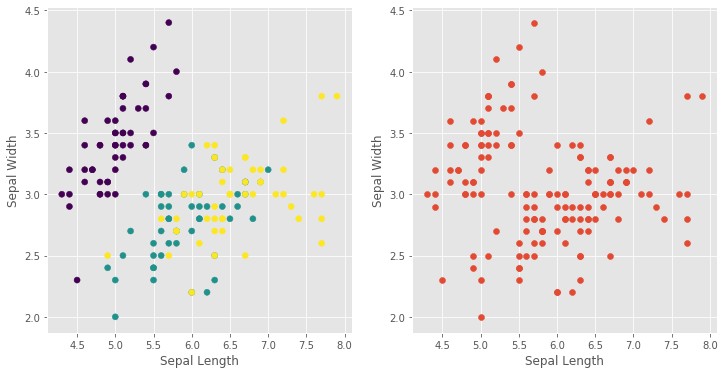

In [53]:
# EDA on the data based on old labels.
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# EDA on the data based on new labels.
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()

<h1>20. Demonstrate to perform support vector classifier on a non linear dataset using a
linear kernel. </h1>

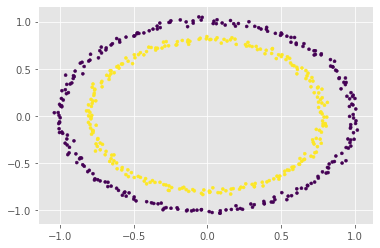

In [54]:
# importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D 
 
# generating data 
X, Y = make_circles(n_samples = 500, noise = 0.02) 
  
# visualizing data 
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.') 
plt.show()

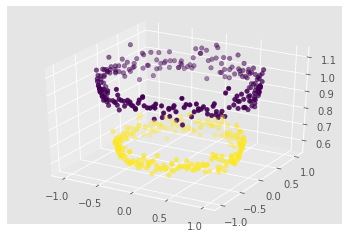

In [55]:
# adding a new dimension to X 
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X = np.hstack((X, X3)) 
  
# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
plt.show()

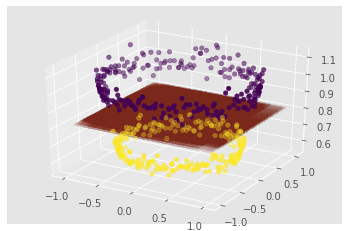

In [56]:
# Now, we can use SVM (or, for that matter, any other linear classifier) to learn a 2-dimensional separating hyperplane. 

# create support vector classifier using a linear kernel. 
from sklearn import svm 
  
svc = svm.SVC(kernel = 'linear') 
svc.fit(X, Y) 
w = svc.coef_ 
b = svc.intercept_ 
  
# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 
  
fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show()